# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [162]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [163]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [164]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [165]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [166]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [167]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response.json(), indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19350318,
            "id": 1,
            "last_updated": 1681871961,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 584496797887,
                    "percent_change_1h": -0.329600402942776,
                    "percent_change_24h": 2.43098812229574,
                    "percent_change_7d": -0.181418909556493,
                    "percentage_change_1h": -0.329600402942776,
                    "percentage_change_24h": 2.43098812229574,
                    "percentage_change_7d": -0.181418909556493,
                    "price": 30206.0,
                    "volume_24h": 17926708292
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19350318,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [168]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response.json(), indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119368246,
            "id": 1027,
            "last_updated": 1681871965,
            "max_supply": 119368246,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 249750109068,
                    "percent_change_1h": -0.30054583982796,
                    "percent_change_24h": 0.454407839533323,
                    "percent_change_7d": 10.5404836893839,
                    "percentage_change_1h": -0.30054583982796,
                    "percentage_change_24h": 0.454407839533323,
                    "percentage_change_7d": 10.5404836893839,
                    "price": 2092.46,
                    "volume_24h": 9814610267
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119368246,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [169]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response.json()['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current price of BTC is ${btc_price}")

The current price of BTC is $30206.0


In [170]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response.json()['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price of ETH is ${eth_price}")

The current price of ETH is $2092.46


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [171]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your BTC holding is ${btc_value}")

The current value of your BTC holding is $36247.2


In [172]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of your ETH holding is ${eth_value}")

The current value of your ETH holding is $11090.038


In [173]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current value of your cryptocurrency wallet is ${total_crypto_wallet}")

The current value of your cryptocurrency wallet is $47337.238


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [174]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [175]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check if the API key and secret key are loaded correctly
print(f"Alpaca API key: {alpaca_api_key}")
print(f"Alpaca secret key: {alpaca_secret_key}")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca API key: PKCZBFTA0S9OAHPH6O4D
Alpaca secret key: mxdUNkqluKrwX241HUWFyMaFz0YlAYZdptEFoPkn


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [176]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [177]:
print(prices_df.head())

symbol                        AGG     SPY
timestamp                                
2018-08-07 04:00:00+00:00  105.85  285.58
2018-08-08 04:00:00+00:00  105.85  285.44
2018-08-09 04:00:00+00:00  106.00  285.09
2018-08-10 04:00:00+00:00  106.23  283.16
2018-08-13 04:00:00+00:00  106.29  282.08


In [178]:
# Use the Alpaca get_bars function to get current closing prices for the portfolio
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Filter the rows for the respective symbols and select only the 'close' column
spy_df = prices_df.loc[prices_df['symbol'] == 'SPY', ['close']]
agg_df = prices_df.loc[prices_df['symbol'] == 'AGG', ['close']]

# Rename the 'close' columns
spy_df.rename(columns={"close": "SPY"}, inplace=True)
agg_df.rename(columns={"close": "AGG"}, inplace=True)

# Concatenate the ticker DataFrames
closing_prices_df = pd.concat([spy_df, agg_df], axis=1)

# Review the first 5 rows of the Alpaca DataFrame
print(closing_prices_df.head())

                              SPY     AGG
timestamp                                
2020-08-07 04:00:00+00:00  334.57  119.43


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [179]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(closing_prices_df.loc['2020-08-07 04:00:00+00:00', 'AGG'])

# Print the AGG closing price
print(f"AGG closing price: ${agg_close_price}")

AGG closing price: $119.43


In [180]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(closing_prices_df.loc['2020-08-07 04:00:00+00:00', 'SPY'])

# Print the SPY closing price
print(f"SPY closing price: ${spy_close_price}")

SPY closing price: $334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [181]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"Current value of the bond portfolio: ${agg_value}")


Current value of the bond portfolio: $23886.0


In [182]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"Current value of the stock portfolio: ${spy_value}")

Current value of the stock portfolio: $36802.7


In [183]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds}")

Current balance of the stock and bond portion of the portfolio: $60688.7


In [184]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"Total value of the entire savings portfolio: ${total_portfolio}")

Total value of the entire savings portfolio: $108025.938


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [185]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[47337.238, 60688.7]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [186]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
display(savings_df)


,amount
crypto,47337.238
stock/bond,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"Composition of Member's Portfolio"}, ylabel='amount'>

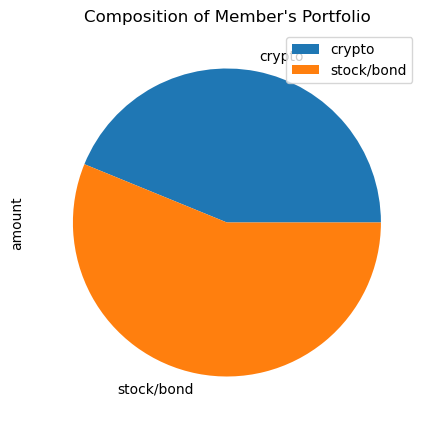

In [187]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount", title="Composition of Member's Portfolio", figsize=(10, 5))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [188]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [189]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have reached your financial goal for the emergency fund.")
else:
    amount_needed = emergency_fund_value - total_portfolio
    print(f"You are ${amount_needed} away from reaching your goal for the emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [190]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2018-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-07", tz="America/New_York").isoformat()

In [191]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
historical_prices = alpaca.get_bars(["SPY", "AGG"], '1D', start=start_date, end=end_date).df

# Reorganize the DataFrame
historical_prices.reset_index(inplace=True)
prices_df = historical_prices.pivot(index='timestamp', columns='symbol', values='close')

# Display both the first and last five rows of the DataFrame
print(prices_df.head())
print(prices_df.tail())


symbol                        AGG     SPY
timestamp                                
2018-08-07 04:00:00+00:00  105.85  285.58
2018-08-08 04:00:00+00:00  105.85  285.44
2018-08-09 04:00:00+00:00  106.00  285.09
2018-08-10 04:00:00+00:00  106.23  283.16
2018-08-13 04:00:00+00:00  106.29  282.08
symbol                        AGG     SPY
timestamp                                
2021-08-02 04:00:00+00:00  116.54  437.59
2021-08-03 04:00:00+00:00  116.58  441.15
2021-08-04 04:00:00+00:00  116.57  438.98
2021-08-05 04:00:00+00:00  116.31  441.76
2021-08-06 04:00:00+00:00  115.79  442.49


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [192]:
# Create a multi-level column DataFrame
prices_df_multiindex = pd.concat([prices_df], axis=1, keys=["close"])

# Set the column names to a multi-level index with the ticker symbols as the first level
prices_df_multiindex.columns = pd.MultiIndex.from_product([prices_df.columns, ['close']])

# Display the first few rows of the modified DataFrame
print(prices_df_multiindex.head())


symbol                        AGG     SPY
                            close   close
timestamp                                
2018-08-07 04:00:00+00:00  105.85  285.58
2018-08-08 04:00:00+00:00  105.85  285.44
2018-08-09 04:00:00+00:00  106.00  285.09
2018-08-10 04:00:00+00:00  106.23  283.16
2018-08-13 04:00:00+00:00  106.29  282.08


In [193]:
mc_sim = MCSimulation(
    portfolio_data=prices_df_multiindex,
    weights=[0.4, 0.6],
    num_simulation=500,
    num_trading_days=252*30
)

# Run the Monte Carlo simulation
mc_sim.calc_cumulative_return()

# Review the simulation input data
mc_sim.portfolio_data.head()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jswhi\FinTech\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

symbol                        AGG                  SPY             
                            close daily_return   close daily_return
timestamp                                                          
2018-08-07 04:00:00+00:00  105.85          NaN  285.58          NaN
2018-08-08 04:00:00+00:00  105.85     0.000000  285.44    -0.000490
2018-08-09 04:00:00+00:00  106.00     0.001417  285.09    -0.001226
2018-08-10 04:00:00+00:00  106.23     0.002170  283.16    -0.006770
2018-08-13 04:00:00+00:00  106.29     0.000565  282.08    -0.003814

In [194]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jswhi\FinTech\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004902,1.013110,0.989927,0.993598,0.998437,0.995469,1.009425,1.005520,1.001719,0.990497,...,0.996535,1.008376,1.003613,0.999159,0.993845,0.997587,0.998571,0.991664,1.012161,1.004847
2,1.004846,1.000826,0.982998,0.991459,1.001776,0.983619,0.995749,1.012342,0.995942,0.992291,...,0.993473,1.008936,0.997687,1.000517,0.989929,0.997565,1.013255,0.991497,1.017675,1.026790
3,0.989824,0.998262,0.989706,0.988030,0.980884,0.974052,0.999546,1.017748,0.996822,0.973758,...,1.000293,1.024362,1.004658,0.991342,0.986734,0.987920,1.008003,0.977543,1.008818,1.032831
4,0.984700,1.015635,0.999304,0.986685,0.978465,0.966244,1.003210,1.000138,0.987800,0.964099,...,0.992184,1.024709,1.017501,1.001156,0.999659,0.990032,1.001735,0.979342,1.005663,1.026008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,42.983900,19.349059,37.006043,82.915633,19.117315,18.380159,12.590683,46.306627,46.551141,20.682144,...,35.385869,13.063227,28.666831,25.317306,62.838027,15.017336,23.980515,39.915245,15.913899,15.379052
7557,43.050387,19.258014,36.610688,82.220662,19.163936,18.483346,12.638819,45.799130,46.306550,20.413102,...,35.156653,12.846396,28.588185,25.280941,63.265069,15.056770,24.308202,40.126890,15.963103,15.370514
7558,42.660075,19.158671,36.560799,82.546258,19.016514,18.504055,12.719084,46.271006,46.289581,20.092075,...,34.988225,12.692704,28.577526,25.138099,63.771954,14.967637,24.357002,40.418164,16.018040,15.414255
7559,42.832014,18.944802,36.901881,83.557182,18.927603,18.263502,12.837944,45.219499,46.478511,19.953954,...,35.004601,12.779174,28.596718,25.339646,63.982721,14.909510,24.240093,40.304042,16.054756,15.585414


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

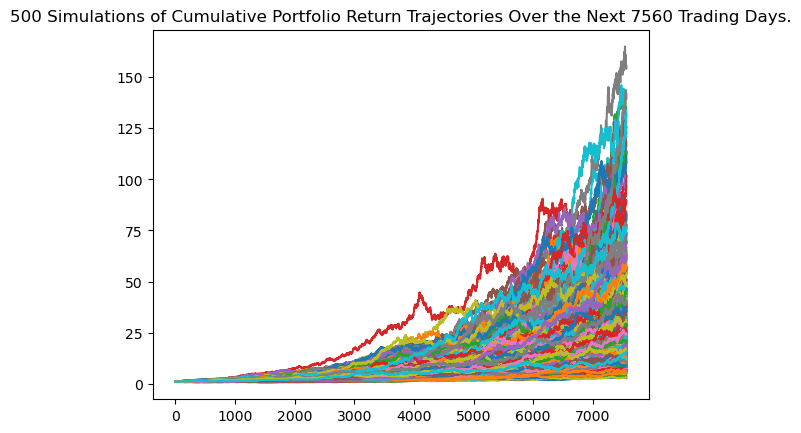

In [195]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_sim.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

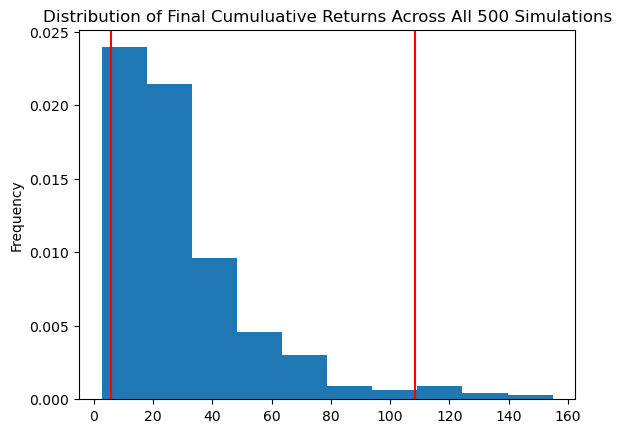

In [196]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_sim.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [197]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary_stats = mc_sim.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(summary_stats)

count           500.000000
mean             30.637947
std              24.578830
min               2.713729
25%              13.359512
50%              24.040092
75%              38.786498
max             154.821887
95% CI Lower      5.927069
95% CI Upper    108.290584
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [198]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds}")



Current balance of the stock and bond portion of the portfolio: $60688.7


In [199]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = summary_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = summary_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f"Lower bound (95% confidence interval) for the portfolio in 30 years: ${ci_lower_thirty_cumulative_return}")
print(f"Upper bound (95% confidence interval) for the portfolio in 30 years: ${ci_upper_thirty_cumulative_return}")


Lower bound (95% confidence interval) for the portfolio in 30 years: $359706.09306606936
Upper bound (95% confidence interval) for the portfolio in 30 years: $6572014.780635374


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [200]:
# Create a multi-level column DataFrame
prices_df_multiindex = pd.concat([prices_df], axis=1, keys=["close"])

# Set the column names to a multi-level index with the ticker symbols as the first level
prices_df_multiindex.columns = pd.MultiIndex.from_product([prices_df.columns, ['close']])


In [201]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_year_simulation = MCSimulation(
    portfolio_data=prices_df_multiindex,
    weights=[0.2, 0.8],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
ten_year_simulation.portfolio_data.head()


symbol                        AGG                  SPY             
                            close daily_return   close daily_return
timestamp                                                          
2018-08-07 04:00:00+00:00  105.85          NaN  285.58          NaN
2018-08-08 04:00:00+00:00  105.85     0.000000  285.44    -0.000490
2018-08-09 04:00:00+00:00  106.00     0.001417  285.09    -0.001226
2018-08-10 04:00:00+00:00  106.23     0.002170  283.16    -0.006770
2018-08-13 04:00:00+00:00  106.29     0.000565  282.08    -0.003814

In [202]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jswhi\FinTech\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992070,1.015190,1.001874,0.985955,1.009008,0.990884,1.019575,0.976787,0.997475,1.007077,...,1.013094,0.996289,0.996695,1.005266,0.996563,1.006408,0.976538,0.992151,1.009500,1.002215
2,0.982706,1.019349,0.991459,1.002647,1.015056,0.976705,1.028392,0.979370,1.030065,1.018760,...,1.032554,1.015597,0.989734,0.977495,1.007810,1.009866,0.966279,0.997949,1.004255,1.016235
3,0.993470,1.026211,1.002109,0.998989,1.026667,0.987740,1.019482,0.978159,1.034284,1.024565,...,1.030997,1.021257,0.974490,0.963793,1.015111,1.017006,0.950653,0.995267,0.995211,0.999994
4,1.000019,1.020124,1.006459,1.001879,1.037445,0.997308,1.017112,0.986542,1.038605,1.016114,...,1.036251,1.036876,0.946750,0.969846,1.017795,1.014359,0.957191,0.995187,1.001503,0.985879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.131559,0.943868,10.958612,2.311079,4.360265,2.069611,3.595601,3.092119,6.442778,0.814883,...,6.862646,6.358003,2.929054,3.407170,9.065220,2.693558,6.890724,2.292816,1.372566,8.315131
2517,4.167979,0.965658,10.866778,2.277618,4.422707,2.044896,3.646459,3.108195,6.528397,0.826203,...,6.830253,6.390006,2.934492,3.391423,8.971627,2.642651,6.952354,2.316583,1.383554,8.292875
2518,4.147333,0.962885,10.760449,2.288074,4.536037,2.054503,3.777039,3.063830,6.481974,0.844024,...,6.820527,6.353884,2.920719,3.416674,8.930285,2.623754,6.984359,2.346221,1.376436,8.301145
2519,4.125221,0.959983,10.584404,2.272811,4.558883,2.065872,3.752647,3.111905,6.384223,0.840301,...,6.945843,6.407264,2.939969,3.420503,8.723702,2.637148,7.051458,2.315307,1.374834,8.385489


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

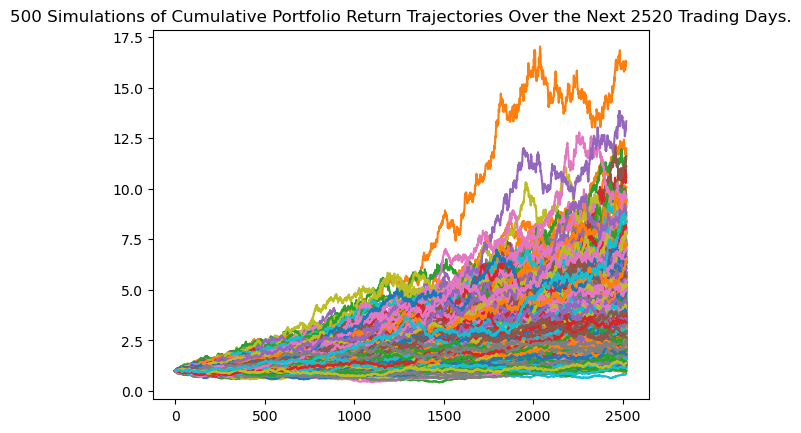

In [203]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

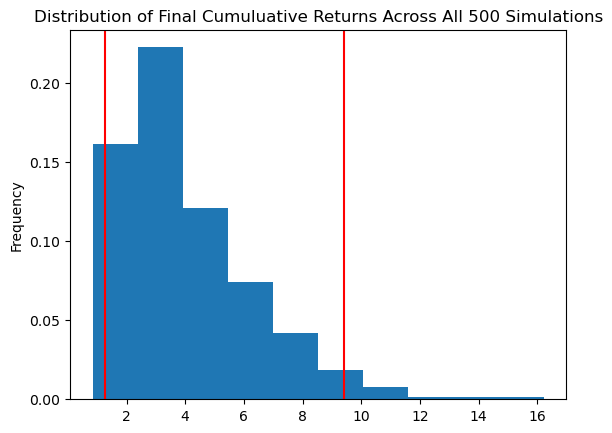

In [204]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()


In [205]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_summary_stats = ten_year_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(ten_year_summary_stats)

count           500.000000
mean              4.020978
std               2.242856
min               0.849512
25%               2.395681
50%               3.421976
75%               5.214263
max              16.219480
95% CI Lower      1.273491
95% CI Upper      9.421952
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [207]:
# Define the number of shares and their current prices
num_shares_agg = 200
num_shares_spy = 50
price_agg = 110.12
price_spy = 450.23

# Calculate the current balance of the stock and bond portion of the member's portfolio
current_balance = num_shares_agg * price_agg + num_shares_spy * price_spy

# Print the current balance of the stock and bond portion of the member's portfolio
print(f"The current balance of the stock and bond portion of the member's portfolio is ${current_balance:,.2f}")


The current balance of the stock and bond portion of the member's portfolio is $44,535.50


In [208]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_year_summary_stats[8] * current_balance
ci_upper_ten_cumulative_return = ten_year_summary_stats[9] * current_balance

# Print the result of your calculations
print(f"The lower bound for the expected value of the portfolio with a 95% confidence interval is ${ci_lower_ten_cumulative_return:,.2f}")
print(f"The upper bound for the expected value of the portfolio with a 95% confidence interval is ${ci_upper_ten_cumulative_return:,.2f}")


The lower bound for the expected value of the portfolio with a 95% confidence interval is $56,715.54
The upper bound for the expected value of the portfolio with a 95% confidence interval is $419,611.34


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?